# Pandas

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np


In [3]:
acoes = ['WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA', 'PETR3.SA']
dados_acoes = yf.download(acoes)['Adj Close']
dados_acoes

[*********************100%%**********************]  5 of 5 completed


,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2000-01-03,NaN,1.519754,1.506321,1.616371,0.122103
2000-01-04,5868.153809,1.434461,1.422993,1.577886,0.117818
2000-01-05,5868.153809,1.453845,1.408635,1.577886,0.117818
2000-01-06,5868.153809,1.442215,1.403763,1.577886,0.107107
2000-01-07,5868.153809,1.453845,1.410173,1.635613,0.107107
...,...,...,...,...,...
2023-10-09,12.680000,37.860001,34.950001,66.379997,34.849998
2023-10-10,13.000000,38.250000,35.209999,66.779999,35.299999
2023-10-11,13.100000,38.119999,35.119999,67.360001,35.169998


In [7]:
# retorno diario
retornos = dados_acoes.pct_change().dropna()
retornos

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14872\3616399522.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = dados_acoes.pct_change().dropna()


,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2000-01-05,0.000000,0.013513,-0.010090,0.000000,0.000000
2000-01-06,0.000000,-0.008000,-0.003458,0.000000,-0.090910
2000-01-07,0.000000,0.008064,0.004566,0.036585,0.000000
2000-01-10,0.000000,0.029334,0.020546,0.082353,0.000000
2000-01-11,0.000000,-0.033679,-0.024586,0.002174,0.000000
...,...,...,...,...,...
2023-10-09,0.007149,0.040968,0.042972,-0.007179,0.001437
2023-10-10,0.025237,0.010301,0.007439,0.006026,0.012913
2023-10-11,0.007692,-0.003399,-0.002556,0.008685,-0.003683


In [8]:
#correlacao
retornos.corr()
#correlacao é a covariancia normalizada

,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
LREN3.SA,1.000000,0.237886,0.229277,0.204978,0.194950
PETR3.SA,0.237886,1.000000,0.926981,0.511471,0.231724
PETR4.SA,0.229277,0.926981,1.000000,0.475931,0.231576
VALE3.SA,0.204978,0.511471,0.475931,1.000000,0.216324
WEGE3.SA,0.194950,0.231724,0.231576,0.216324,1.000000


In [9]:
#covariancia
retornos.cov()

,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
LREN3.SA,0.001054,0.000211,0.000199,0.000169,0.000133
PETR3.SA,0.000211,0.000745,0.000675,0.000355,0.000133
PETR4.SA,0.000199,0.000675,0.000713,0.000323,0.000130
VALE3.SA,0.000169,0.000355,0.000323,0.000647,0.000116
WEGE3.SA,0.000133,0.000133,0.000130,0.000116,0.000445


[*********************100%%**********************]  6 of 6 completed


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14872\3338796246.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = dados_acoes.pct_change().dropna()


[]

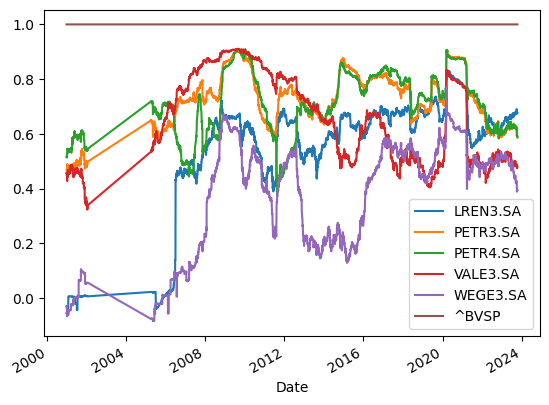

In [13]:
#correlacao com BVSP
acoes = ['WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA', 'PETR3.SA', '^BVSP']
dados_acoes = yf.download(acoes)['Adj Close']

retornos = dados_acoes.pct_change().dropna()

#separando o retorno do ibov
retorno_ibov = retornos['^BVSP']

#dropando da tabela de retornos
retornos.drop('^BVSP', axis= 1)

#aplicando uma correlacao entre DFs com rolling
corr_movel = retornos.rolling(252).corr(retorno_ibov)
corr_movel = corr_movel.dropna().plot()
corr_movel.plot()

#a tabela mostra o quanto o retorno de 1 ano se correlaciona com a acao do ibov

<Axes: xlabel='Date'>

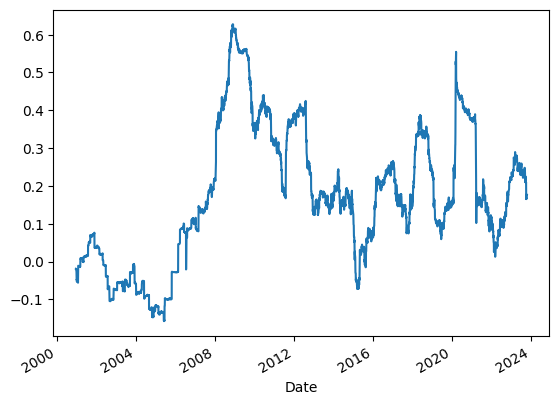

In [16]:
corr_weg_vale = retornos['WEGE3.SA'].rolling(252).corr(retornos['VALE3.SA']).dropna()
corr_weg_vale.plot()

## Desafios

In [40]:
acoes = ['ITUB3.SA', 'ITUB4.SA', 'SANB11.SA', 'WEGE3.SA', 'ABEV3.SA']
dados_acoes = yf.download(acoes, start= '2000-10-10')['Adj Close']


[*********************100%%**********************]  5 of 5 completed


In [41]:
retornos = dados_acoes.pct_change().dropna()
corr_36m = retornos.corr().dropna()
corr_36m

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14872\750362222.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = dados_acoes.pct_change().dropna()


,ABEV3.SA,ITUB3.SA,ITUB4.SA,SANB11.SA,WEGE3.SA
ABEV3.SA,1.000000,0.419375,0.436895,0.389326,0.326115
ITUB3.SA,0.419375,1.000000,0.896588,0.634743,0.324074
ITUB4.SA,0.436895,0.896588,1.000000,0.694151,0.331547
SANB11.SA,0.389326,0.634743,0.694151,1.000000,0.296320
WEGE3.SA,0.326115,0.324074,0.331547,0.296320,1.000000


In [36]:
ibov = yf.download('^BVSP', start = '2000-01-01')['Adj Close']
sp500 = yf.download('^GSPC', start = '2000-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.series.Series'>
Date
2000-01-10    -0.867114
2000-01-11    -0.946846
2000-01-12     3.518626
2000-01-13   -55.389593
2000-01-14    -1.021051
                ...    
2023-10-09     4.035969
2023-10-10     0.497241
2023-10-11    -0.727503
2023-10-13     1.169751
2023-10-16    -0.653034
Name: Adj Close, Length: 5885, dtype: float64
Date
2000-01-10      -1.009324
2000-01-11       2.704353
2000-01-12      -0.654137
2000-01-13       5.164120
2000-01-14      -0.844348
                 ...     
2023-10-09      -0.961754
2023-10-10      -0.695666
2023-10-11       1.971880
2023-10-12   -1200.126471
2023-10-13      -1.000878
Name: Adj Close, Length: 5979, dtype: float64


<Axes: xlabel='Date'>

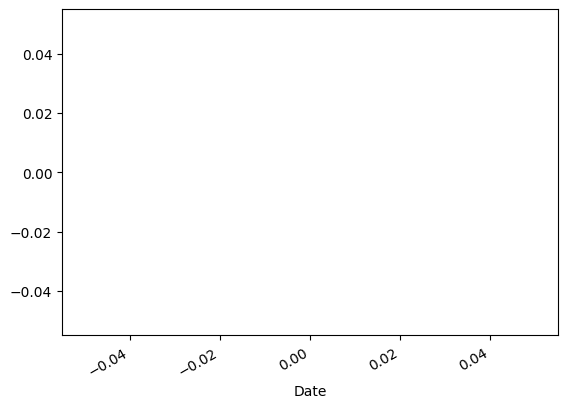

In [48]:
ibov = ibov.pct_change().dropna()
sp500 = sp500.pct_change().dropna()

print(type(ibov))

print(ibov)
print(sp500)


corr = ibov.rolling(252).corr(sp500).dropna()
corr.plot()

[*********************100%%**********************]  2 of 2 completed
                    ^BVSP        ^GSPC
Date                                  
2023-10-10  116737.000000  4358.240234
2023-10-11  117051.000000  4376.950195
2023-10-12            NaN  4349.609863
2023-10-13  115754.000000  4327.779785
2023-10-16  116273.929688  4353.370117
<class 'pandas.core.frame.DataFrame'>


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14872\914993795.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = dados_indices.pct_change().dropna()


<Axes: xlabel='Date'>

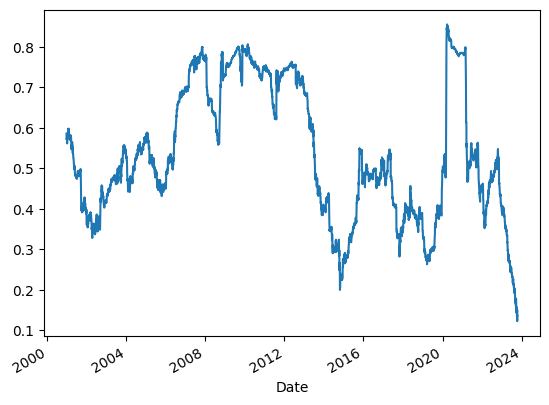

In [50]:
#gabarito, juntou no mesmo df e aplicou .corr entre colunas
acoes = ['^GSPC', '^BVSP']
dados_indices = yf.download(acoes, '2000-01-01')['Adj Close']
print(dados_indices.tail(5))
print(type(dados_indices))

retornos = dados_indices.pct_change().dropna()
corr_movel = retornos['^BVSP'].rolling(252).corr(retornos['^GSPC']).dropna()

corr_movel.plot()